<a href="https://colab.research.google.com/github/Oluwatosin-Babatunde/bikesales_datadive/blob/main/oluwatosin_agbaakin_lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Oluwatosin Agbaakin - Cloud Computing Lab 4 - 2001292765**

# **PART A**

---



# **Import Libraries, initialize Spark, and load dataset and including error handling**

In [7]:
!pip install pyspark

In [1]:
# Import necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc
from pyspark.sql.utils import AnalysisException
import matplotlib.pyplot as plt

# Initialize Spark with optimized configurations for large datasets
try:
    spark = SparkSession.builder \
        .appName("WildlifeTradeAnalysis") \
        .config("spark.sql.shuffle.partitions", "50") \
        .config("spark.executor.memory", "4g") \
        .getOrCreate()
    print("Spark session initialized.")
except Exception as e:
    print(f"Error initializing Spark: {e}")

# Load dataset with error handling
data_path = "/home/wildlife_trade.csv"
try:
    wildlife_df = spark.read.csv(data_path, header=True, inferSchema=True)
    print("Data loaded successfully.")
except AnalysisException as ae:
    print(f"Data loading failed: {ae}")
except Exception as e:
    print(f"Unexpected error: {e}")

# Display a sample to verify data structure
wildlife_df.show(10)

Spark session initialized.
Data loaded successfully.
+----+----+--------------------+-----------+----------------+-------------+----------+---------+
|Year|App.|               Taxon|      Class|           Order|       Family|     Genus|     Term|
+----+----+--------------------+-----------+----------------+-------------+----------+---------+
|2016|   I|      Aquila heliaca|       Aves|   Falconiformes| Accipitridae|    Aquila|   bodies|
|2016|   I|      Aquila heliaca|       Aves|   Falconiformes| Accipitridae|    Aquila|   bodies|
|2016|   I|Haliaeetus albicilla|       Aves|   Falconiformes| Accipitridae|Haliaeetus| feathers|
|2016|   I|Haliaeetus albicilla|       Aves|   Falconiformes| Accipitridae|Haliaeetus|specimens|
|2016|   I|Haliaeetus albicilla|       Aves|   Falconiformes| Accipitridae|Haliaeetus|specimens|
|2016|   I|Haliaeetus albicilla|       Aves|   Falconiformes| Accipitridae|Haliaeetus|   bodies|
|2016|   I|      Harpia harpyja|       Aves|   Falconiformes| Accipitridae

# **Most Frequent Class of Animal Traded with visualization:**

+-----------+-----+
|      Class|count|
+-----------+-----+
|   Reptilia|18430|
|   Anthozoa| 8781|
|   Mammalia| 8505|
|       Aves| 6861|
|Actinopteri| 2759|
+-----------+-----+



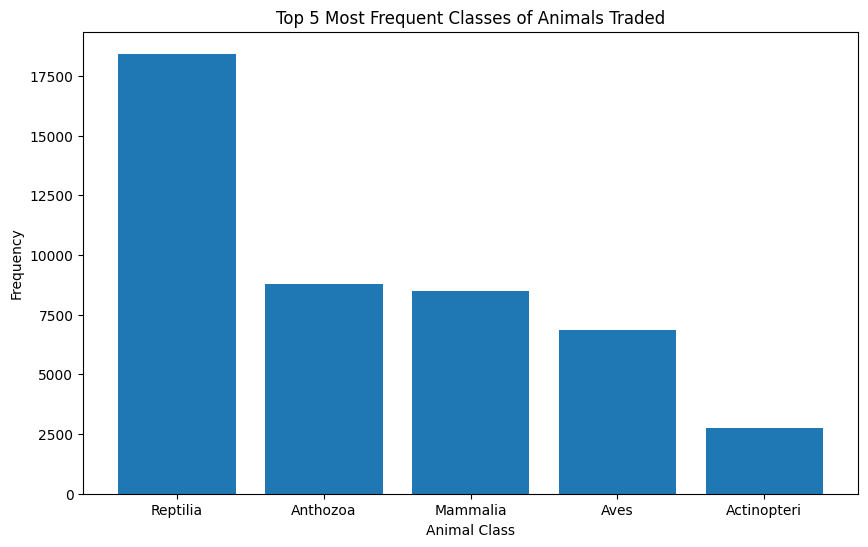

In [2]:
try:
    most_frequent_class = wildlife_df.groupBy("Class") \
        .agg(count("Class").alias("count")) \
        .orderBy(desc("count")) \
        .limit(5)

    most_frequent_class.show()

    # Convert to Pandas DataFrame for visualization
    frequent_class_pd = most_frequent_class.toPandas()

    # Plot the top 5 most frequent classes of animals traded
    plt.figure(figsize=(10, 6))
    plt.bar(frequent_class_pd["Class"], frequent_class_pd["count"])
    plt.title("Top 5 Most Frequent Classes of Animals Traded")
    plt.xlabel("Animal Class")
    plt.ylabel("Frequency")
    plt.show()

except Exception as e:
    print(f"Error in Task 1: {e}")

# **List all items (Term) traded associated with mammals:**

In [3]:
mammal_items = wildlife_df.filter(col("Class") == "Mammalia") \
    .select("Term") \
    .distinct()

# Display the result
mammal_items.show()

+-------------------+
|               Term|
+-------------------+
|               gall|
|             baleen|
|              claws|
|        unspecified|
|               meat|
|             skulls|
|fur product (small)|
|     ivory carvings|
|            extract|
|             fibres|
|      horn carvings|
|              tails|
|               hair|
|               feet|
|             scales|
|          specimens|
|        bone pieces|
|      bone carvings|
|        skin pieces|
|        horn pieces|
+-------------------+
only showing top 20 rows



# **List all CITES Appendix II species**

In [4]:

appendix_ii_species = wildlife_df.filter(col("`App.`") == "II") \
    .select("Taxon") \
    .distinct()

# Show result
appendix_ii_species.show()

+--------------------+
|               Taxon|
+--------------------+
|   Aquila chrysaetos|
|     Buteo polyosoma|
|  Polyboroides typus|
|Acipenser nudiven...|
| Acropora digitifera|
|    Acropora grandis|
|     Acropora maryae|
|     Acropora navini|
|Montipora austral...|
|Montipora peltifo...|
|     Balaeniceps rex|
|   Tillandsia hybrid|
|  Penelopides panini|
|  Cacatua pastinator|
|Consolea spinosis...|
|   Escobaria sneedii|
|Ferocactus chrysa...|
|Ferocactus schwarzii|
|Geohintonia mexicana|
|Lymanbensonia cre...|
+--------------------+
only showing top 20 rows



# **Most common animal (Taxon) traded in 2017 with visualization**

+--------------------+-----+
|               Taxon|count|
+--------------------+-----+
|Alligator mississ...|   18|
|Crocodylus niloticus|    7|
|  Python reticulatus|    5|
|Arctocephalus pus...|    5|
|    Varanus salvator|    4|
+--------------------+-----+



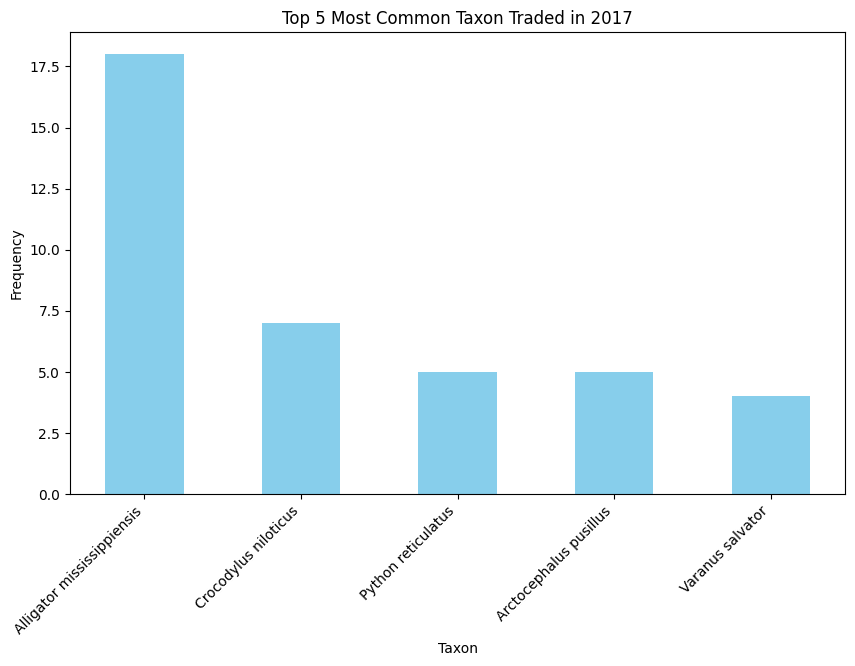

In [10]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc
import matplotlib.pyplot as plt

common_taxon_2017 = wildlife_df.filter(col("Year") == 2017) \
    .groupBy("Taxon") \
    .agg(count("Taxon").alias("count")) \
    .orderBy(desc("count")) \
    .limit(5)

# Show the result in Spark
common_taxon_2017.show()

# Convert result to Pandas DataFrame for plotting
common_taxon_2017_pd = common_taxon_2017.toPandas()

# Plotting the chart
plt.figure(figsize=(10, 6))
plt.bar(common_taxon_2017_pd["Taxon"], common_taxon_2017_pd["count"], width=0.5, color='skyblue')
plt.title("Top 5 Most Common Taxon Traded in 2017")
plt.xlabel("Taxon")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

#**Classes of animals for specific items:**

In [13]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc, collect_list
import matplotlib.pyplot as plt

# Define items to filter
specific_items = ["teeth", "live", "carvings"]

# Filter for specified items
items_classes = wildlife_df.filter(col("Term").isin(specific_items)) \
    .select("Class", "Term") \
    .distinct() \
    .groupBy("Term") \
    .agg(collect_list("Class").alias("Classes"))

# Show results without truncation
items_classes.show(truncate=False)

+--------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|Term    |Classes                                                                                                                                                 |
+--------+--------------------------------------------------------------------------------------------------------------------------------------------------------+
|carvings|[Gastropoda, Mammalia, Aves, Reptilia, Bivalvia, Hydrozoa, Anthozoa]                                                                                    |
|live    |[Aves, Reptilia, Mammalia, Insecta, Dipneusti, Anthozoa, Arachnida, Elasmobranchii, Gastropoda, Amphibia, Hirudinoidea, Hydrozoa, Actinopteri, Bivalvia]|
|teeth   |[Mammalia, Reptilia]                                                                                                                                    |
+--------+------

# **PART B**

---



# **Import libraries and load dataset**

In [14]:
from pyspark.sql import Row
from pyspark.sql.functions import col, explode, collect_list

# Load dataset
graph_data_path = "/home/graph data.csv"
graph_df = spark.read.csv(graph_data_path, header=True, inferSchema=True)

# Display sample
graph_df.show(5)

+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
| 00| 11| 02| 13| 14| 05| 16| 17| 18| 09|010|111|012|113|114|015|116|117|018|119|020|121|022|123|124|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|  1|  0|  0|  1|  0|  0|  1|  0|  1|  0|  0|  1|  0|  0|  1|  0|  1|  0|  1|  0|  0|  1|  0|  1|  0|
|  0|  1|  0|  1|  1|  0|  0|  0|  1|  0|  0|  0|  0|  1|  1|  0|  0|  1|  0|  0|  0|  1|  1|  0|  1|
|  0|  1|  1|  0|  0|  0|  1|  0|  0|  0|  1|  1|  0|  1|  0|  0|  1|  1|  0|  0|  1|  0|  1|  1|  0|
|  0|  0|  1|  1|  0|  1|  1|  1|  0|  0|  0|  1|  0|  1|  0|  0|  1|  1|  1|  0|  0|  0|  0|  1|  1|
|  1|  0|  1|  1|  0|  0|  1|  0|  1|  0|  1|  1|  0|  1|  0|  0|  1|  1|  0|  0|  1|  1|  1|  0|  0|
+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
only showing top 5 rows



# **Find All Self-Loops:**

In [18]:
# Display column names
print(graph_df.columns)
self_loops = graph_df.filter(col("source") == col("destination"))

# Show result
self_loops.show()

['source', 'destination', '02', '13', '14', '05', '16', '17', '18', '09', '010', '111', '012', '113', '114', '015', '116', '117', '018', '119', '020', '121', '022', '123', '124']
+------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|source|destination| 02| 13| 14| 05| 16| 17| 18| 09|010|111|012|113|114|015|116|117|018|119|020|121|022|123|124|
+------+-----------+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
|     0|          0|  1|  1|  0|  1|  1|  1|  0|  0|  0|  1|  0|  1|  0|  0|  1|  1|  1|  0|  0|  0|  0|  1|  1|
|     0|          0|  0|  1|  0|  1|  0|  1|  1|  0|  1|  1|  0|  0|  1|  0|  0|  1|  1|  0|  1|  1|  0|  0|  1|
|     1|          1|  0|  1|  1|  0|  0|  0|  1|  0|  1|  0|  1|  0|  0|  1|  1|  0|  1|  0|  0|  1|  0|  1|  1|
|     1|          1|  0|  1|  0|  0|  1|  0|  1|  0|  0|  1|  0|  0|  0|  0|  1|  1|  1|  0|  0|  1|  1|  1|  0|
|     0|          0|  1|  1|  

# **The node with the largest out-degree:**

In [19]:
out_degree = graph_df.groupBy("source") \
    .count() \
    .orderBy(desc("count")) \
    .limit(1)

# Show result
out_degree.show()

+------+-----+
|source|count|
+------+-----+
|     0|   16|
+------+-----+



# **The node with the largest in-degree:**

In [20]:
in_degree = graph_df.groupBy("destination") \
    .count() \
    .orderBy(desc("count")) \
    .limit(1)

# Show the result
in_degree.show()

+-----------+-----+
|destination|count|
+-----------+-----+
|          1|   13|
+-----------+-----+



# **Distribution of vertices in-degrees:**

In [21]:
in_degree_distribution = graph_df.groupBy("destination") \
    .count() \
    .groupBy("count") \
    .count() \
    .orderBy("count")

# Show result
in_degree_distribution.show()

+-----+-----+
|count|count|
+-----+-----+
|   11|    1|
|   13|    1|
+-----+-----+



# **Find a Path Between Node 1 and Node 9**

In [30]:
from pyspark.sql.functions import array_contains, array_union, array, lit

# Initialize start and end nodes
start_node = 1
end_node = 9

# Initialize a DataFrame for paths
paths_df = spark.createDataFrame([(start_node, [start_node])], ["node", "path"])

# Initialize final_path to None before the loop
final_path = None

for _ in range(25):
    # Join paths_df with graph_df to expand paths
    expanded_paths = paths_df.join(graph_df, paths_df.node == graph_df.source) \
        .select(graph_df.destination.alias("node"),
                array_union(paths_df.path, array(graph_df.destination)).alias("path")) \
        .filter(~array_contains(col("path"), col("node"))) # Use array_contains instead of isin

    # Check if destination node is reached
    if expanded_paths.filter(col("node") == end_node).count() > 0:
        final_path = expanded_paths.filter(col("node") == end_node).select("path").first()["path"]
        break

    # Update paths_df with expanded_paths for the next iteration
    paths_df = expanded_paths

# Show result, handle case where final_path is None
if final_path:
    print(f"Path from node {start_node} to node {end_node}: {final_path}")
else:
    print(f"No path found from node {start_node} to node {end_node}")

No path found from node 1 to node 9


# **Oluwatosin Agbaakin - Cloud Computing Lab 4 - 2001292765**